<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/RTAS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30


In [5]:
!pip install opencv-contrib-python

     |████████████████████████████████| 66.6 MB 148 kB/s 


In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pylab import *
from numpy import *
from scipy import linalg

In [7]:
k = [[1698.873755, 0.000000, 971.7497705],
     [0.000000, 1698.8796645, 647.7488275],
     [0.000000, 0.000000, 1.000000]]

k = np.asarray(k)

In [8]:
k

array([[1.69887376e+03, 0.00000000e+00, 9.71749770e+02],
       [0.00000000e+00, 1.69887966e+03, 6.47748827e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [9]:
img1 = cv2.imread('/content/im1.jpg', 0)
img2 = cv2.imread('/content/im2.jpg', 0)

In [55]:
def find_correspondences(img1, img2):
  sift = cv2.xfeatures2d.SIFT_create()
  kp1, des1 = sift.detectAndCompute(img1,None)
  kp2, des2 = sift.detectAndCompute(img2,None)
  flann = cv2.FlannBasedMatcher(dict(algorithm = 0, trees = 5),dict(checks=50))
  matches = flann.knnMatch(des1,des2,k=2)
  pts1 = []
  pts2 = []

  # ratio test as per Lowe's paper
  j = 1
  for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        j = j+1
        if j == 101:
          break

  return np.asarray(pts1), np.asarray(pts2)

In [56]:
pts1, pts2 = find_correspondences(img1, img2)

In [57]:
pts1.shape

(100, 2)

In [113]:
def compute_essential(x1, x2):
  n = x1.shape[1]
  print(n)
  if x2.shape[1] != n:
    raise ValueError("Number of points don't match.")
  print(x1)
  print(x1[1,1])
  # build matrix for equations
  A = zeros((n,9))
  for i in range(n):
      A[i] = [x1[0,i]*x2[0,i], x1[0,i]*x2[1,i], x1[0,i]*x2[2,i],
              x1[1,i]*x2[0,i], x1[1,i]*x2[1,i], x1[1,i]*x2[2,i],
              x1[2,i]*x2[0,i], x1[2,i]*x2[1,i], x1[2,i]*x2[2,i]]
  print(A.shape)
            
  # compute linear least square solution
  U,S,V = linalg.svd(A)
  E = V[-1].reshape(3,3)
  # constrain F
  # make rank 2 by zeroing out last singular value
  U,S,V = linalg.svd(E)
  S[2] = 0
  F = dot(U,dot(diag(S),V))
    
  return F/F[2,2]


In [114]:
E = compute_essential(pts1, pts2)

2
[[ 599 1055]
 [ 605 1068]
 [ 607 1039]
 [ 614 1084]
 [ 615 1029]
 [ 618 1109]
 [ 618 1051]
 [ 620 1117]
 [ 622 1096]
 [ 622 1096]
 [ 622 1100]
 [ 623 1104]
 [ 625 1068]
 [ 631 1111]
 [ 635 1092]
 [ 639 1025]
 [ 639 1105]
 [ 640 1078]
 [ 642 1111]
 [ 642 1111]
 [ 642 1029]
 [ 642 1029]
 [ 645 1081]
 [ 647 1023]
 [ 654 1080]
 [ 659 1119]
 [ 664 1078]
 [ 664  977]
 [ 665 1065]
 [ 671 1090]
 [ 676 1075]
 [ 677 1045]
 [ 677 1051]
 [ 679 1119]
 [ 685 1120]
 [ 688 1058]
 [ 690 1064]
 [ 691  989]
 [ 695 1110]
 [ 696 1102]
 [ 699 1058]
 [ 700 1054]
 [ 714 1001]
 [ 714  961]
 [ 714 1004]
 [ 730  782]
 [ 730  992]
 [ 731 1060]
 [ 731  499]
 [ 732  984]
 [ 733  543]
 [ 734  514]
 [ 735 1018]
 [ 735  718]
 [ 735 1018]
 [ 736  729]
 [ 736  944]
 [ 738  752]
 [ 738  847]
 [ 739 1010]
 [ 740 1004]
 [ 741 1014]
 [ 742  983]
 [ 742  970]
 [ 743  996]
 [ 743  486]
 [ 743  505]
 [ 743  516]
 [ 744  736]
 [ 745  568]
 [ 745  595]
 [ 746 1056]
 [ 746  601]
 [ 747  787]
 [ 747  902]
 [ 747  899]
 [ 748  41

In [91]:
E

array([[-0.73846857,  1.31708587, -0.50840306],
       [ 0.16757726,  0.21367701, -0.43340058],
       [-0.45568295, -0.41429911,  1.        ]])

In [95]:
F

array([[-2.04394996e-07,  3.44273725e-06,  1.53002765e-03],
       [-2.28942782e-06,  6.60486132e-07, -1.60402456e-02],
       [-1.54926769e-03,  1.39891852e-02,  1.00000000e+00]])

In [48]:
pts1[0]

(255.8468780517578, 729.1962890625)

In [49]:
pts2[0]

(350.19805908203125, 755.1000366210938)

In [94]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [15]:
print(F)

[[-1.60739701e-07  3.62635851e-06  1.23836270e-03]
 [-2.43180077e-06  2.84918643e-07 -1.82433307e-02]
 [-1.35283043e-03  1.66135815e-02  1.00000000e+00]]


In [16]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

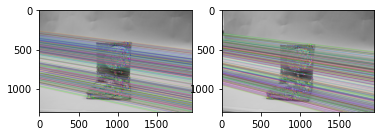

In [17]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()